导入需要的库，包括 Pandas 用于读取 CSV 文件，Matplotlib 和 Seaborn 用于绘制图形。

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

使用 Pandas 读取 CSV 文件，并将数据存储在 DataFrame 中。

In [61]:
# df = pd.read_csv('Data_V1.2.csv')

# # Insert a new column for the hard reported ratio
# df['hard_reported_ratio'] = df['Number in hard mode'] / df['Number of  reported results']

调用 DataFrame 的 corr 方法，计算数据之间的相关性系数矩阵。

In [62]:
# corr_matrix = df.corr()

使用 Seaborn 的 heatmap 函数绘制相关度图。你可以设置图形的颜色、标签和标题。

In [63]:
# plt.figure(figsize=(10, 8)) # 设置图形大小
# sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f') # 绘制相关度图，设置颜色和标签
# plt.title('Corr') # 添加标题
# plt.show() # 显示图形

只想显示最后一行的热力图，并去掉自身的相关系数，可以在绘制热力图时指定只显示最后一行，并将最后一行的值替换为 NaN。

In [64]:
# # 选取最后一行
# corr_matrix_last = corr_matrix.tail(1)
# # 去掉最后一格，仅保留之前
# corr_matrix_last = corr_matrix.iloc[:, :-1]

# plt.figure(figsize=(16, 1))
# sns.heatmap(corr_matrix_last.tail(1), cmap='coolwarm', annot=True,
#             fmt='.2f', cbar=False)
# plt.title('corr')
# plt.savefig('corr.png', dpi=1000, bbox_inches='tight')
# plt.show()

In [65]:
# ggplot
# import pyensae
# from pyensae.graphhelper import Corrplot
# plt.figure(figsize=(16, 1))
# c=Corrplot(corr_matrix_last)
# c.plot(mar=c(0, 0, 0, 0))

In [66]:
# from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('20220328-or.csv')

# # # Find the same letter count in the word column
# # df['Collision'] = df['Word'].apply(lambda x: len(x) - len(set(x)))
# # # Save back to csv
# # df.to_csv('Data_V1.4_corr.csv', index=False)

# # removed_cols = ['Word', 'Date', 'Number of reported results', 'Number in hard mode', '1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)', 'eu', 'oe', 'fj']
# removed_cols = []
# df = df.drop(removed_cols, axis=1)


# Convert time string to timestamp
time_cols1 = ['手术日期', '手术开始时间', '手术结束时间']  # 2019-11-25 17:54:00
time_cols2 = ['入院时间',	'出院时间']  # 2019/11/21 9:14
for col in time_cols1:
    # To timestamp
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')
for col in time_cols2:
    df[col] = pd.to_datetime(df[col], format='%Y/%m/%d %H:%M')


# Save to new csv
df.to_csv('20220328-or-clean.csv', index=False)

# Convert datetime to float
for col in time_cols1:
    df[col] = df[col].astype('int64') / 10**9
for col in time_cols2:
    df[col] = df[col].astype('int64') / 10**9

# Set NaN to negative of max value of the column
for col in df.columns:
    df[col] = df[col].fillna(-df[col].max())

# Normalize 0-1
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Save to new csv
df.to_csv('20220328-or-clean-norm.csv', index=False)

In [67]:
df = pd.read_csv('20220328-or-clean-norm.csv')

removed_cols = ['Postoperative Olanzapine', 'Postoperative Fluphenazine', 'Postoperative Flupentixol']
df = df.drop(removed_cols, axis=1)

In [68]:
# def get_corr_with_nn(df):
#     import tensorflow as tf
#     import numpy as np

#     # 使用TensorFlow Keras构建一个简单的神经网络
#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(64, activation='relu'),
#         tf.keras.layers.Dense(1)
#     ])
#     model.compile(optimizer='adam', loss='mse')

#     # 对每一列使用神经网络进行非线性相关度分析
#     nn_mat = np.zeros((len(df.columns), len(df.columns)))
#     for i in range(len(df.columns)):
#         for j in range(i, len(df.columns)):
#             x = df.iloc[:, i].values.reshape(-1, 1)
#             y = df.iloc[:, j].values.reshape(-1, 1)
#             model.fit(x, y, epochs=10, verbose=0)
#             corr = np.corrcoef(y.T, model.predict(x).T)[0, 1]
#             nn_mat[i, j] = corr
#             nn_mat[j, i] = corr
#     return nn_mat

In [69]:
# Get the correlation matrix
# corr_matrix = df.corr()
# # 或者可以使用 pandas 的 corrwith() 函数
from sklearn.feature_selection import mutual_info_regression
corr_matrix = df.apply(lambda x: df.apply(lambda y: mutual_info_regression(x.values.reshape(-1, 1), y.values)[0]))
# corr_matrix = get_corr_with_nn(df)

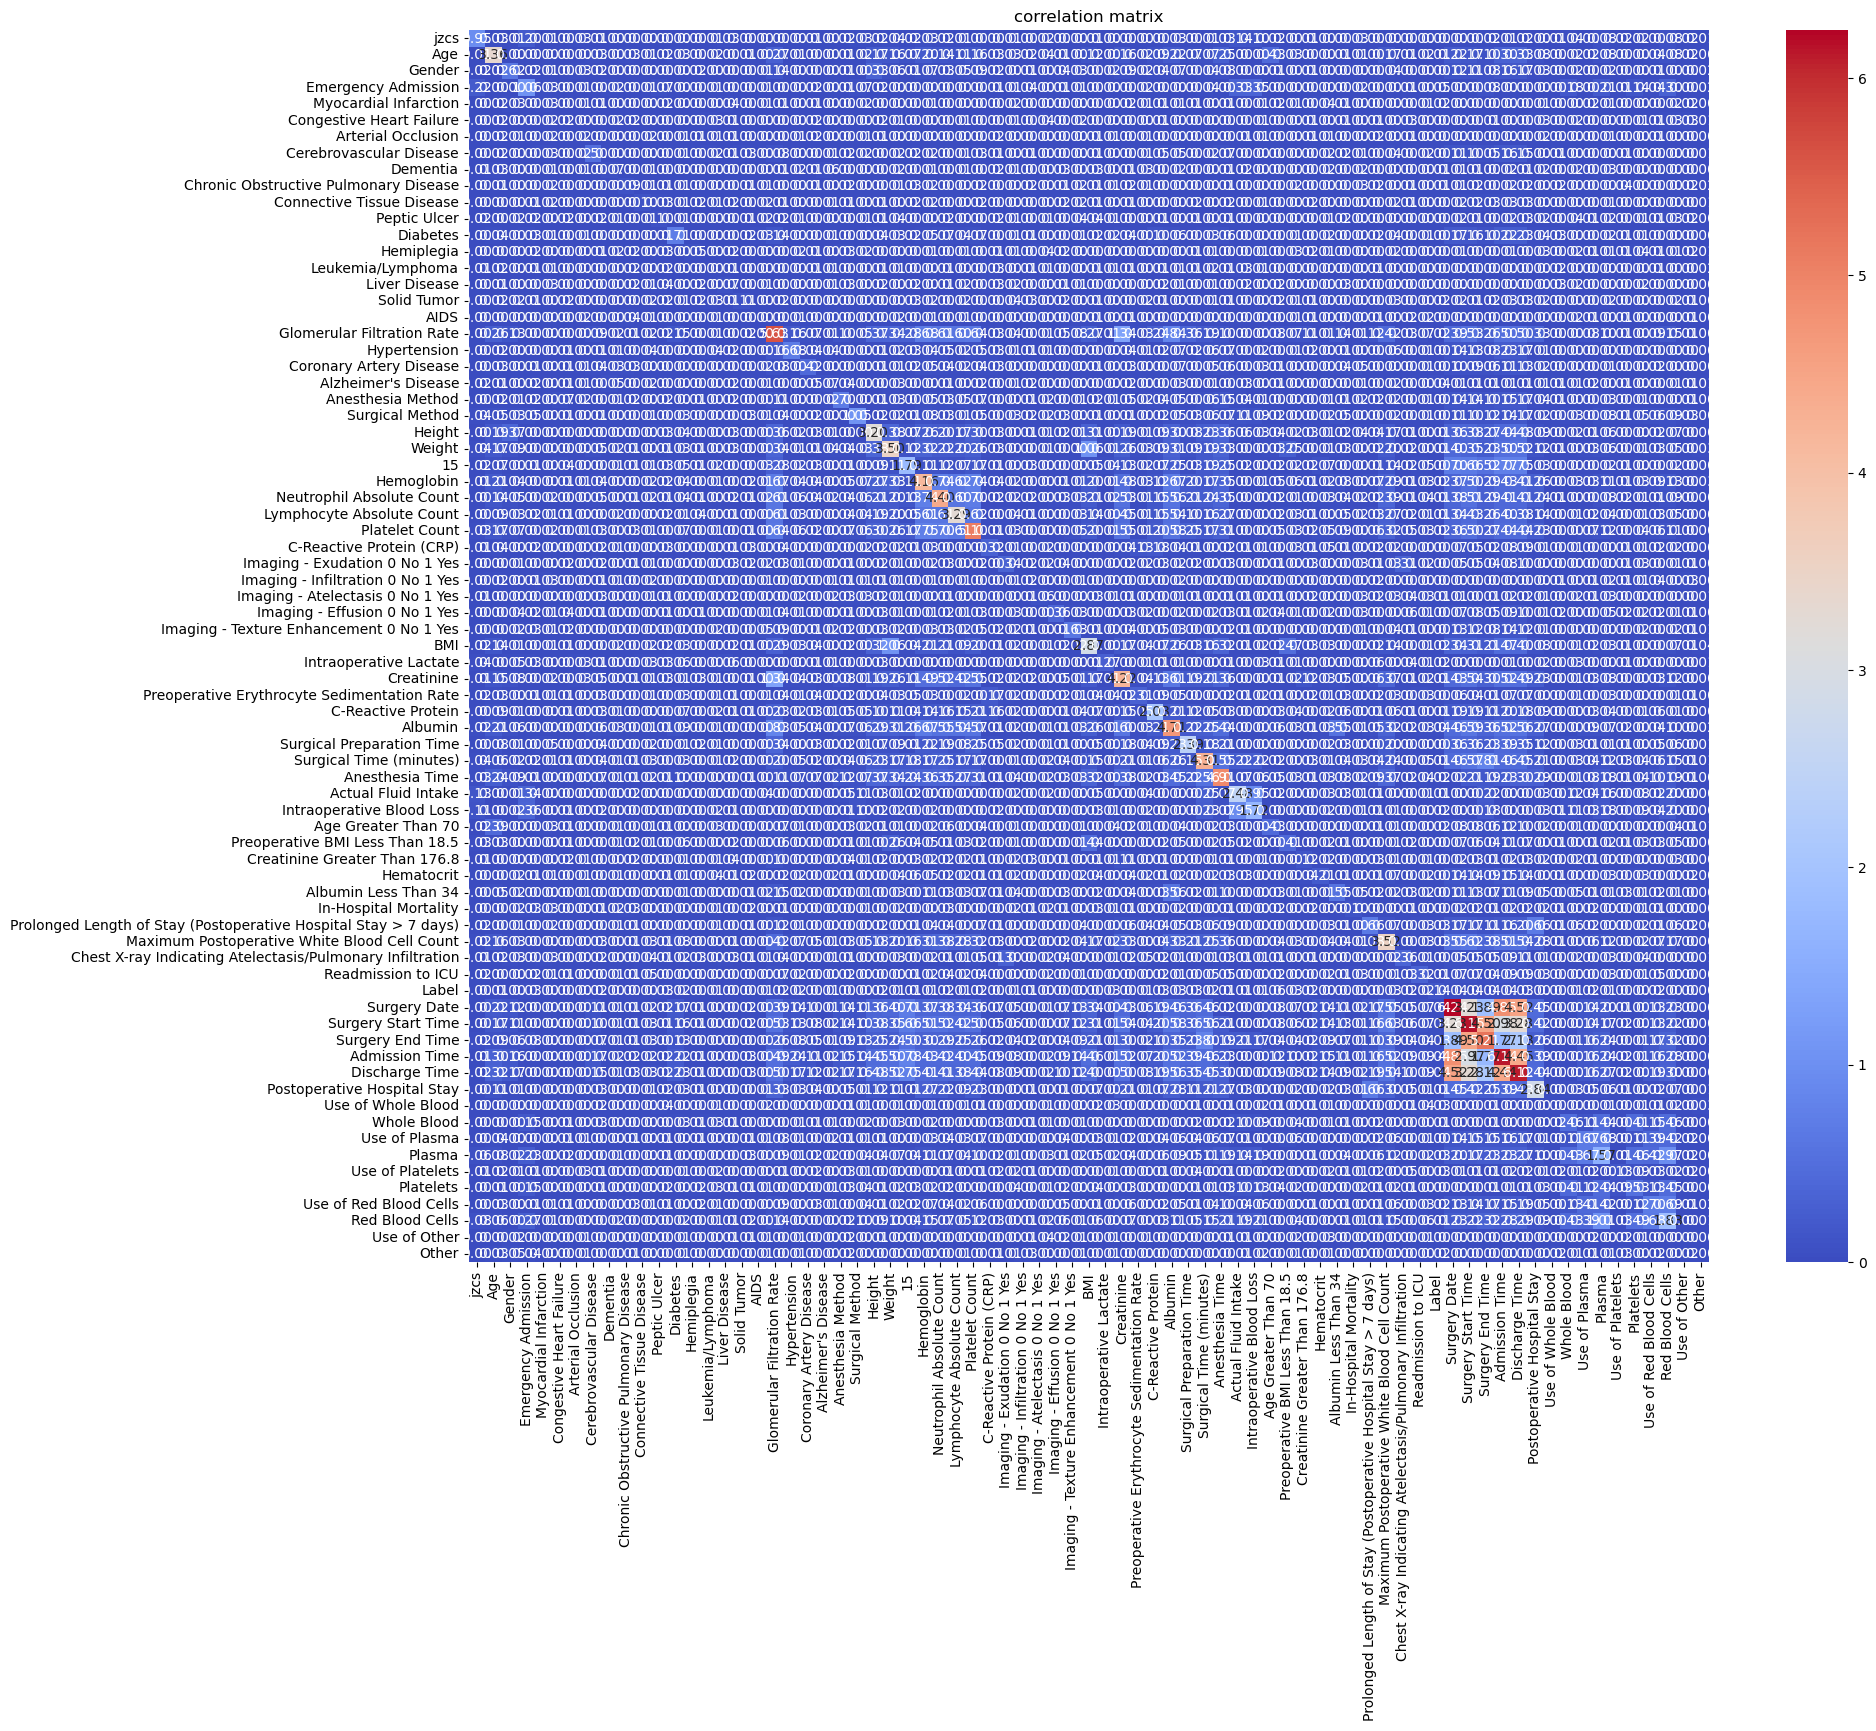

In [70]:
# Plot the correlation matrix
# Plot full matrix
plt.figure(figsize=(20, 16)) # 设置图形大小
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f') # 绘制相关度图，设置颜色和标签
plt.title('correlation matrix') # 添加标题
# plt.savefig('corrfull.png', dpi=1000, bbox_inches='tight')
plt.show() # 显示图形

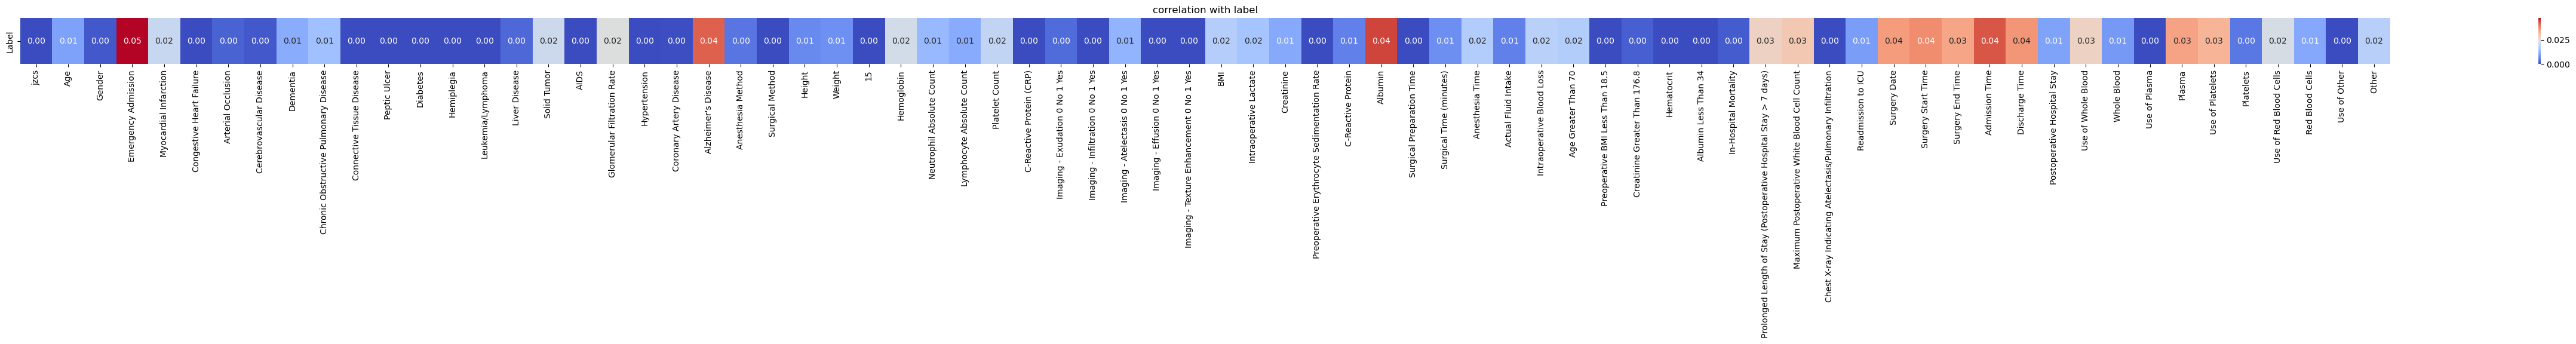

                        Label
Emergency Admission  0.047631
Albumin              0.044000
Admission Time       0.042458
Alzheimer's Disease  0.041595
Surgery Start Time   0.037170
Discharge Time       0.036134
Surgery Date         0.035395
Plasma               0.034594
Surgery End Time     0.034246
Use of Platelets     0.032298


In [71]:
# Plot the correlation with "Average" column
corr_matrix_last = corr_matrix['Label']
corr_matrix_last = corr_matrix_last.drop('Label')

# reshape the data
corr_matrix_last = corr_matrix_last.to_frame()
corr_matrix_last = corr_matrix_last.transpose()

plt.figure(figsize=(64, 1))
sns.heatmap(corr_matrix_last.tail(1), cmap='coolwarm', annot=True,
            fmt='.2f')
plt.title('correlation with label')
# plt.savefig('corraratio.png', dpi=1000, bbox_inches='tight')
plt.show()

# Print top 10 correlation
corr_matrix_last = corr_matrix_last.transpose()
corr_matrix_last = corr_matrix_last.sort_values(by='Label', ascending=False)
print(corr_matrix_last.head(10))

In [72]:
# df = pd.read_csv('20220328-or.csv')
# df = df.fillna(0)

# # Find the same letter count in the word column
# df['Collision'] = df['Word'].apply(lambda x: len(x) - len(set(x)))
# # Save back to csv
# df.to_csv('Data_V1.4_corr.csv', index=False)

# removed_cols = ['Postoperative Olanzapine',	'Postoperative Fluphenazine',	'Postoperative Flupentixol']
# input_cols = df.columns
# df = df[input_cols]
# df = df.drop(removed_cols, axis=1)

In [73]:
from sklearn.feature_selection import mutual_info_regression
corr_matrix = df.apply(lambda x: df.apply(lambda y: mutual_info_regression(x.values.reshape(-1, 1), y.values)[0]))

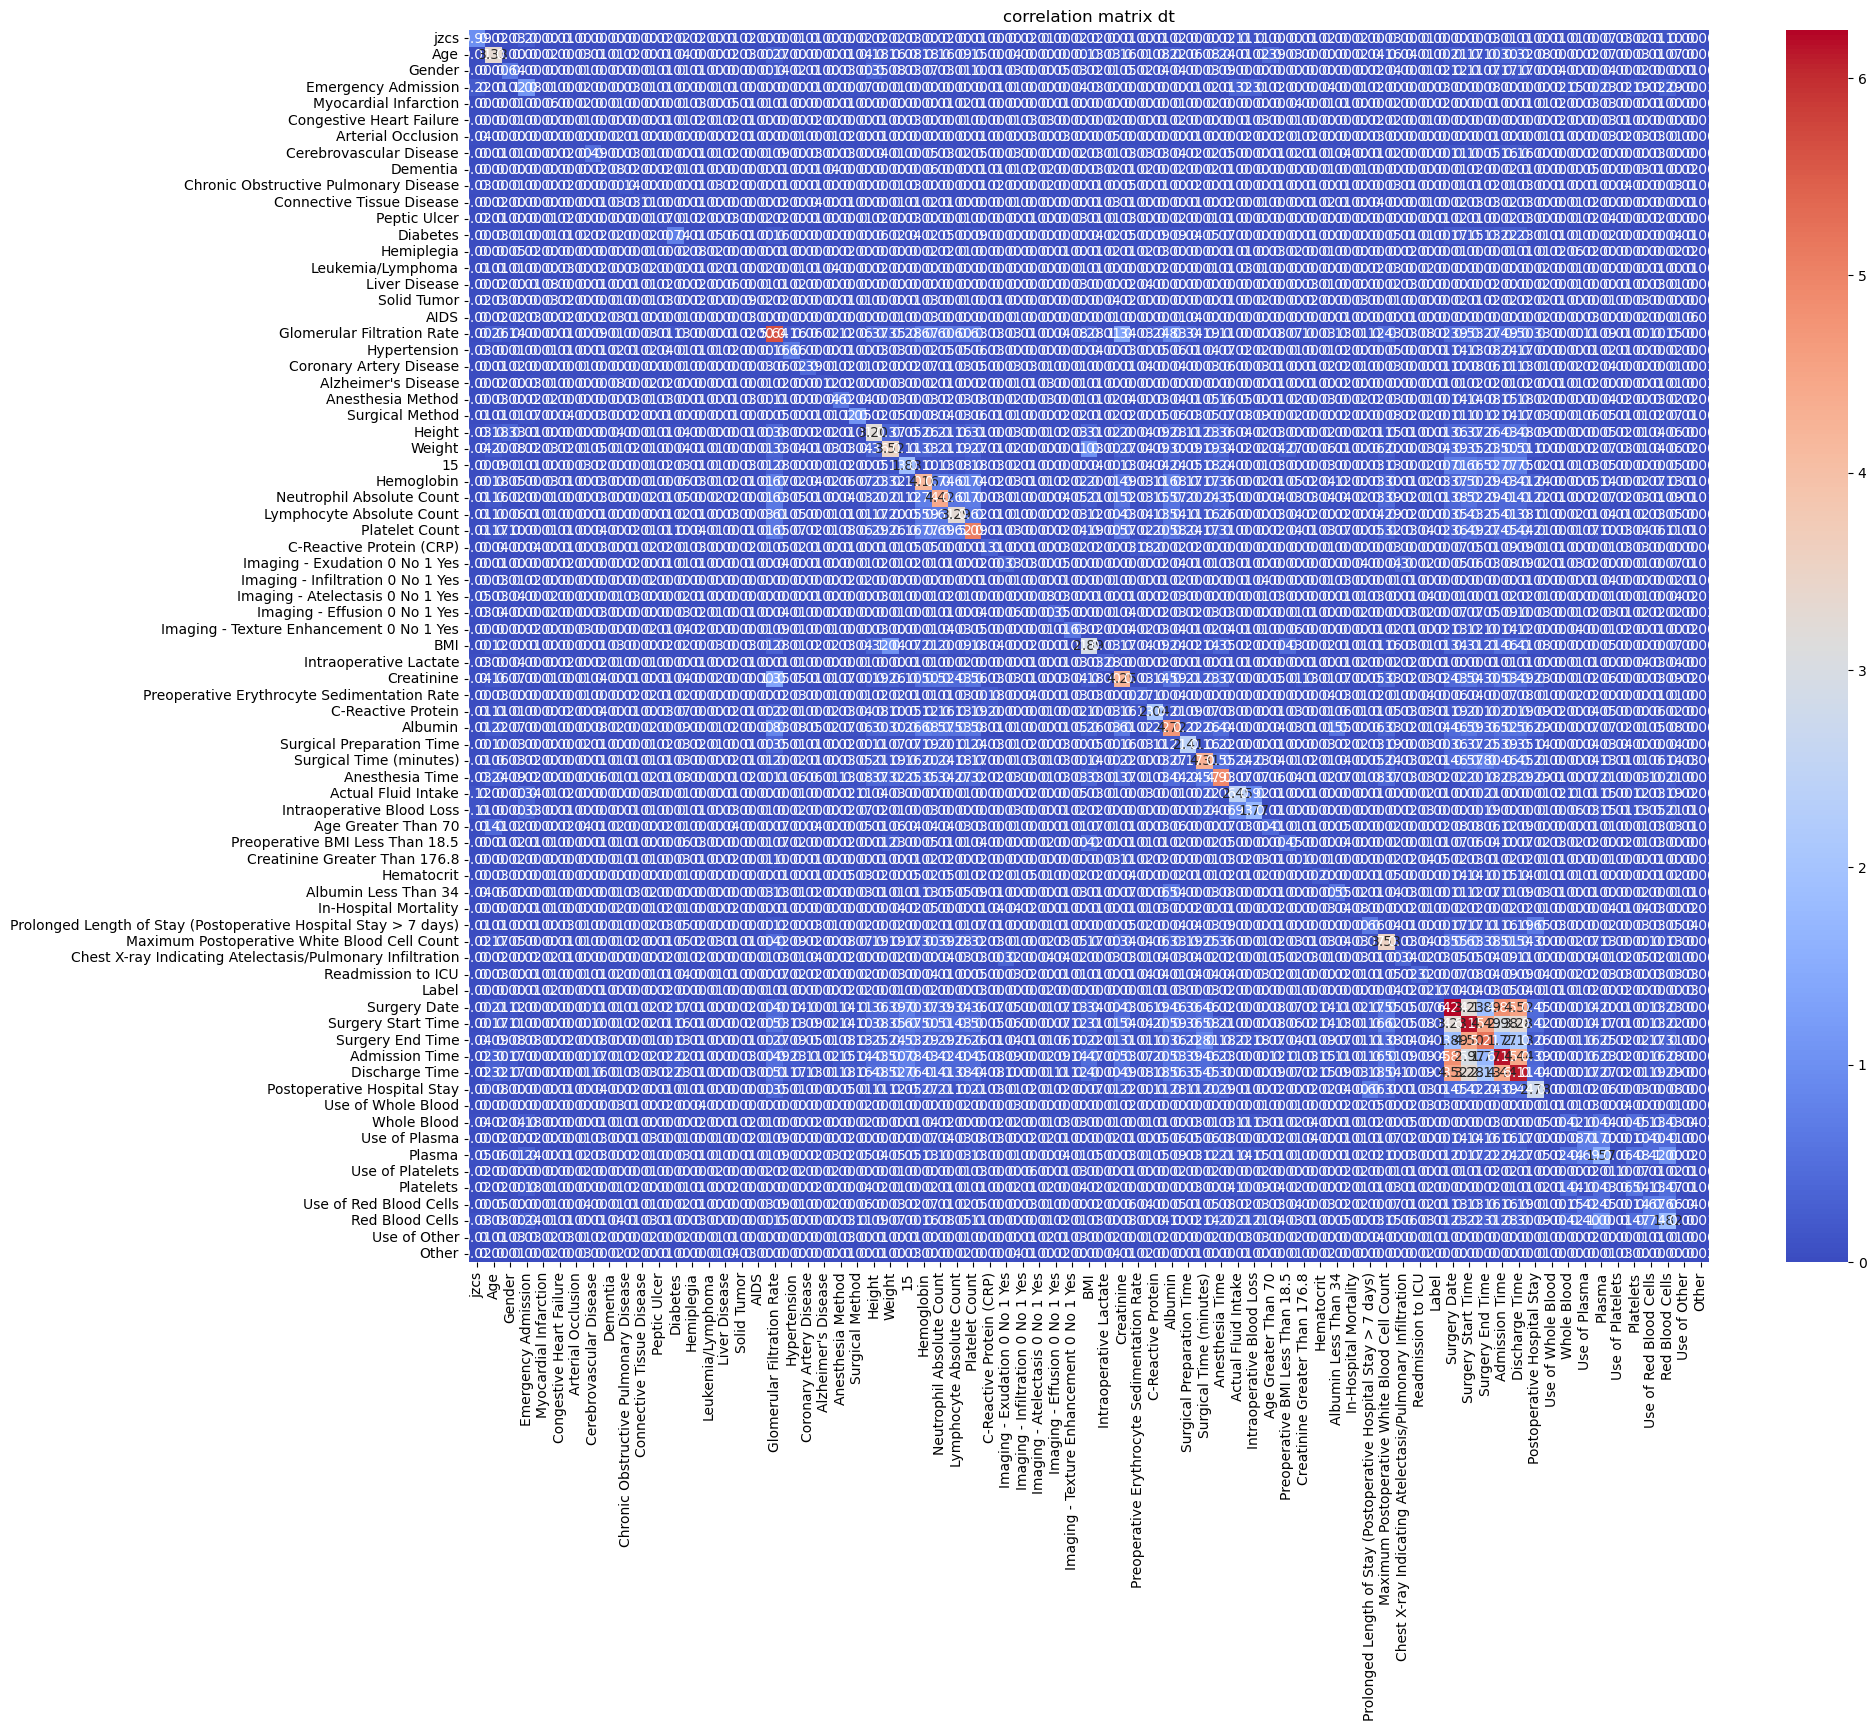

In [74]:
# Plot the correlation matrix
# Plot full matrix
plt.figure(figsize=(20, 16)) # 设置图形大小
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f') # 绘制相关度图，设置颜色和标签
plt.title('correlation matrix dt') # 添加标题
# plt.savefig('corrfull.png', dpi=1000, bbox_inches='tight')
plt.show() # 显示图形

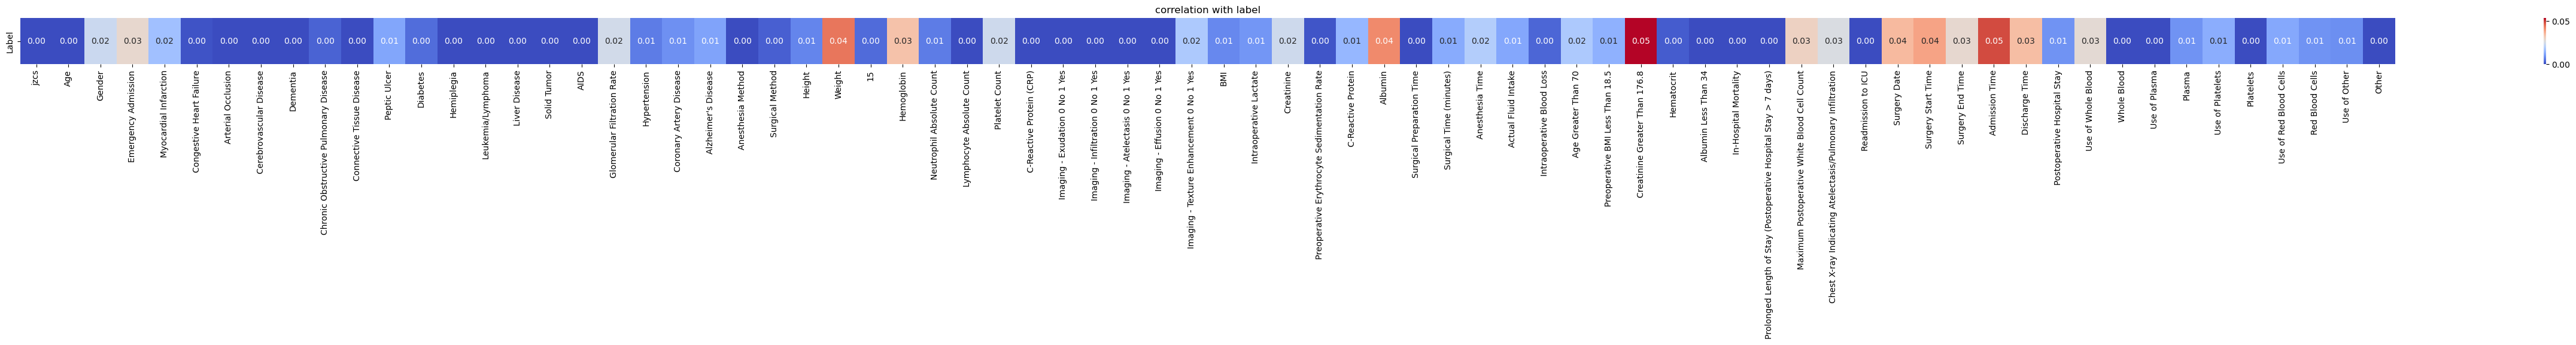

                                                 Label
Creatinine Greater Than 176.8                 0.053678
Admission Time                                0.049000
Weight                                        0.044517
Albumin                                       0.042279
Surgery Start Time                            0.038793
Surgery Date                                  0.035395
Discharge Time                                0.034755
Hemoglobin                                    0.033957
Maximum Postoperative White Blood Cell Count  0.030755
Emergency Admission                           0.029050


In [75]:
# Plot the correlation with "Average" column
corr_matrix_last = corr_matrix['Label']
corr_matrix_last = corr_matrix_last.drop('Label')

# reshape the data
corr_matrix_last = corr_matrix_last.to_frame()
corr_matrix_last = corr_matrix_last.transpose()

plt.figure(figsize=(64, 1))
sns.heatmap(corr_matrix_last.tail(1), cmap='coolwarm', annot=True,
            fmt='.2f')
plt.title('correlation with label')
plt.savefig('corraratiodt.png', dpi=1000, bbox_inches='tight')
plt.show()

# Print top 10 correlation
corr_matrix_last = corr_matrix_last.transpose()
corr_matrix_last = corr_matrix_last.sort_values(by='Label', ascending=False)
print(corr_matrix_last.head(10))